# Импорт необходимых библиотек

In [1]:
import pandas as pd #библиотека для обработки и анализа данных
import matplotlib .pyplot as plt #билиотека для визуализации данных двумерной и трёхмерной графикой.
import numpy as np #библиотека для для выполнения математических и числовых операций
import seaborn as sns #библиотека для создания статистических графиков 
from sklearn.preprocessing import StandardScaler #библиотека метода масштабирования данных
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
# pd.options.display.float_format = '{:,.0f}'.format
pd.options.display.float_format ='{:,.3f}'.format
import datetime
from datetime import timedelta
import math
import json

pd.options.display.max_rows = 2000

# Загрузка данных

In [2]:
df_loaded = pd.read_csv("https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/owid-covid-data.csv", parse_dates=["date"])
df = df_loaded

# Предобработка данных

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 320274 entries, 0 to 320273
Data columns (total 67 columns):
 #   Column                                      Non-Null Count   Dtype         
---  ------                                      --------------   -----         
 0   iso_code                                    320274 non-null  object        
 1   continent                                   305048 non-null  object        
 2   location                                    320274 non-null  object        
 3   date                                        320274 non-null  datetime64[ns]
 4   total_cases                                 287547 non-null  float64       
 5   new_cases                                   311310 non-null  float64       
 6   new_cases_smoothed                          310046 non-null  float64       
 7   total_deaths                                269083 non-null  float64       
 8   new_deaths                                  311356 non-null  float64      

In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
total_cases,"287,547.000","5,915,161.456","36,974,255.273",1.000,"6,359.500","61,775.000","648,353.000","768,186,332.000"
new_cases,"311,310.000","10,458.979","101,536.916",0.000,0.000,14.000,490.000,"7,945,885.000"
new_cases_smoothed,"310,046.000","10,499.898","98,821.554",0.000,0.857,35.000,605.000,"6,403,052.429"
total_deaths,"269,083.000","80,069.501","417,655.013",1.000,113.000,"1,111.000","10,198.000","6,945,701.000"
new_deaths,"311,356.000",93.273,592.540,0.000,0.000,0.000,5.000,"20,042.000"
new_deaths_smoothed,"310,126.000",93.623,583.245,0.000,0.000,0.286,6.286,"14,674.714"
total_cases_per_million,"287,547.000","90,271.593","141,358.080",0.000,"1,949.844","21,229.570","112,412.656","737,554.506"
new_cases_per_million,"311,310.000",158.007,"1,116.844",0.000,0.000,1.988,64.090,"228,872.025"
new_cases_smoothed_per_million,"310,046.000",158.629,626.056,0.000,0.192,9.643,98.432,"37,241.781"
total_deaths_per_million,"269,083.000",807.831,"1,060.239",0.000,43.739,328.203,"1,245.716","6,484.454"


In [5]:
print(df.isna().sum()/len(df)*100)

iso_code                                      0.000
continent                                     4.754
location                                      0.000
date                                          0.000
total_cases                                  10.218
new_cases                                     2.799
new_cases_smoothed                            3.194
total_deaths                                 15.984
new_deaths                                    2.784
new_deaths_smoothed                           3.169
total_cases_per_million                      10.218
new_cases_per_million                         2.799
new_cases_smoothed_per_million                3.194
total_deaths_per_million                     15.984
new_deaths_per_million                        2.784
new_deaths_smoothed_per_million               3.169
reproduction_rate                            42.294
icu_patients                                 88.547
icu_patients_per_million                     88.547
hosp_patient

In [6]:
df.shape

(320274, 67)

Просмотрев статистику по датафрейму, можно сказать, что выборка имеет размерность 67 на 314880, много столбцов содержат большое количество пропусков и выбросов, а также присутствует 5 столбцов типа object (остальные float)

### Удаление столбцов с большим количеством пропусков

In [7]:
for i in df:
    if (df[i].isna().sum()/len(df)*100 > 35):
        df.drop(columns=i, inplace = True)

In [8]:
print(df.isna().sum()/len(df)*100)

iso_code                           0.000
continent                          4.754
location                           0.000
date                               0.000
total_cases                       10.218
new_cases                          2.799
new_cases_smoothed                 3.194
total_deaths                      15.984
new_deaths                         2.784
new_deaths_smoothed                3.169
total_cases_per_million           10.218
new_cases_per_million              2.799
new_cases_smoothed_per_million     3.194
total_deaths_per_million          15.984
new_deaths_per_million             2.784
new_deaths_smoothed_per_million    3.169
population_density                15.147
median_age                        21.081
aged_65_older                     23.844
aged_70_older                     21.872
gdp_per_capita                    22.658
cardiovasc_death_rate             22.507
diabetes_prevalence               18.558
hospital_beds_per_thousand        31.593
life_expectancy 

In [9]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
total_cases,"287,547.000","5,915,161.456","36,974,255.273",1.000,"6,359.500","61,775.000","648,353.000","768,186,332.000"
new_cases,"311,310.000","10,458.979","101,536.916",0.000,0.000,14.000,490.000,"7,945,885.000"
new_cases_smoothed,"310,046.000","10,499.898","98,821.554",0.000,0.857,35.000,605.000,"6,403,052.429"
total_deaths,"269,083.000","80,069.501","417,655.013",1.000,113.000,"1,111.000","10,198.000","6,945,701.000"
new_deaths,"311,356.000",93.273,592.540,0.000,0.000,0.000,5.000,"20,042.000"
new_deaths_smoothed,"310,126.000",93.623,583.245,0.000,0.000,0.286,6.286,"14,674.714"
total_cases_per_million,"287,547.000","90,271.593","141,358.080",0.000,"1,949.844","21,229.570","112,412.656","737,554.506"
new_cases_per_million,"311,310.000",158.007,"1,116.844",0.000,0.000,1.988,64.090,"228,872.025"
new_cases_smoothed_per_million,"310,046.000",158.629,626.056,0.000,0.192,9.643,98.432,"37,241.781"
total_deaths_per_million,"269,083.000",807.831,"1,060.239",0.000,43.739,328.203,"1,245.716","6,484.454"


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 320274 entries, 0 to 320273
Data columns (total 27 columns):
 #   Column                           Non-Null Count   Dtype         
---  ------                           --------------   -----         
 0   iso_code                         320274 non-null  object        
 1   continent                        305048 non-null  object        
 2   location                         320274 non-null  object        
 3   date                             320274 non-null  datetime64[ns]
 4   total_cases                      287547 non-null  float64       
 5   new_cases                        311310 non-null  float64       
 6   new_cases_smoothed               310046 non-null  float64       
 7   total_deaths                     269083 non-null  float64       
 8   new_deaths                       311356 non-null  float64       
 9   new_deaths_smoothed              310126 non-null  float64       
 10  total_cases_per_million          287547 non-

### 

In [11]:
df.dropna(subset=["total_cases"], inplace = True) #удаление NaN значений в столбце total_cases

In [12]:
df.dropna(subset=["new_cases"], inplace = True) #удаление NaN значений в столбце new_cases

Было осуществлено очищение столбцов total_cases и new_cases от NaN значений, так как я посчитал, что информация в данных столбцах представляет ценность для обучения модели и отражает краткую и емкую характеристику эпидемологической ситуации в странах

### Вычисление коэффициента заболеваемости Rt для каждого дня в выборке

In [13]:
df['new_cases_4days_avg'] = df['new_cases'].rolling(window=4).mean()

# Вычисление скользящего среднего числа заболевших за предыдущие 4 дня
df['prev_new_cases_4days_avg'] = df['new_cases'].shift(4).rolling(window=4).mean()

# Вычисление коэффициента Rt
df['Rt'] = df['new_cases_4days_avg'] / df['prev_new_cases_4days_avg']

In [14]:
df.loc[df["Rt"] > 1.5]

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,gdp_per_capita,cardiovasc_death_rate,diabetes_prevalence,hospital_beds_per_thousand,life_expectancy,human_development_index,population,new_cases_4days_avg,prev_new_cases_4days_avg,Rt
66,AFG,Asia,Afghanistan,2020-03-09,4.000,3.000,0.429,NaN,0.000,0.000,...,"1,803.987",597.029,9.590,0.500,64.830,0.511,"41,128,772.000",0.750,0.000,inf
67,AFG,Asia,Afghanistan,2020-03-10,4.000,0.000,0.429,NaN,0.000,0.000,...,"1,803.987",597.029,9.590,0.500,64.830,0.511,"41,128,772.000",0.750,0.000,inf
68,AFG,Asia,Afghanistan,2020-03-11,4.000,0.000,0.429,NaN,0.000,0.000,...,"1,803.987",597.029,9.590,0.500,64.830,0.511,"41,128,772.000",0.750,0.000,inf
69,AFG,Asia,Afghanistan,2020-03-12,7.000,3.000,0.857,NaN,0.000,0.000,...,"1,803.987",597.029,9.590,0.500,64.830,0.511,"41,128,772.000",1.500,0.000,inf
74,AFG,Asia,Afghanistan,2020-03-17,16.000,6.000,1.714,NaN,0.000,0.000,...,"1,803.987",597.029,9.590,0.500,64.830,0.511,"41,128,772.000",2.250,0.750,3.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
320255,ZWE,Africa,Zimbabwe,2023-06-03,"265,139.000",32.000,21.000,"5,695.000",0.000,0.429,...,"1,899.775",307.846,1.820,1.700,61.490,0.571,"16,320,539.000",27.250,9.500,2.868
320264,ZWE,Africa,Zimbabwe,2023-06-12,"265,289.000",128.000,18.286,"5,702.000",7.000,1.000,...,"1,899.775",307.846,1.820,1.700,61.490,0.571,"16,320,539.000",32.000,2.250,14.222
320265,ZWE,Africa,Zimbabwe,2023-06-13,"265,289.000",0.000,18.286,"5,702.000",0.000,1.000,...,"1,899.775",307.846,1.820,1.700,61.490,0.571,"16,320,539.000",32.000,0.000,inf
320266,ZWE,Africa,Zimbabwe,2023-06-14,"265,289.000",0.000,18.286,"5,702.000",0.000,1.000,...,"1,899.775",307.846,1.820,1.700,61.490,0.571,"16,320,539.000",32.000,0.000,inf


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 287421 entries, 54 to 320271
Data columns (total 30 columns):
 #   Column                           Non-Null Count   Dtype         
---  ------                           --------------   -----         
 0   iso_code                         287421 non-null  object        
 1   continent                        272332 non-null  object        
 2   location                         287421 non-null  object        
 3   date                             287421 non-null  datetime64[ns]
 4   total_cases                      287421 non-null  float64       
 5   new_cases                        287421 non-null  float64       
 6   new_cases_smoothed               287151 non-null  float64       
 7   total_deaths                     268983 non-null  float64       
 8   new_deaths                       287376 non-null  float64       
 9   new_deaths_smoothed              287140 non-null  float64       
 10  total_cases_per_million          287421 non

In [16]:
df.dropna(subset=["Rt"], inplace = True) #удаление NaN значений в столбце Rt

### Удаление лишних столбцов

In [17]:
df = df[["Rt","new_cases","total_cases","date","location"]] #оставляем 5 столбцов

In [18]:
df

,Rt,new_cases,total_cases,date,location
61,0.000,0.000,1.000,2020-03-04,Afghanistan
66,inf,3.000,4.000,2020-03-09,Afghanistan
67,inf,0.000,4.000,2020-03-10,Afghanistan
68,inf,0.000,4.000,2020-03-11,Afghanistan
69,inf,3.000,7.000,2020-03-12,Afghanistan
...,...,...,...,...,...
320267,inf,0.000,"265,289.000",2023-06-15,Zimbabwe
320268,0.000,0.000,"265,289.000",2023-06-16,Zimbabwe
320269,0.000,0.000,"265,289.000",2023-06-17,Zimbabwe
320270,0.000,0.000,"265,289.000",2023-06-18,Zimbabwe


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 251659 entries, 61 to 320271
Data columns (total 5 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Rt           251659 non-null  float64       
 1   new_cases    251659 non-null  float64       
 2   total_cases  251659 non-null  float64       
 3   date         251659 non-null  datetime64[ns]
 4   location     251659 non-null  object        
dtypes: datetime64[ns](1), float64(3), object(1)
memory usage: 11.5+ MB


In [20]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Rt,"251,659.000",inf,NaN,0.000,0.701,1.000,1.422,inf
new_cases,"251,659.000","12,938.082","112,789.228",0.000,1.000,62.000,903.000,"7,945,885.000"
total_cases,"251,659.000","6,700,133.038","39,435,392.036",1.000,"9,089.000","88,783.000","830,997.000","768,186,332.000"


В столбцах присутствуют выбросы, а столбец Rt содержит значение inf, поэтому необходимо оставить лишь корректные данные

In [21]:
#убираем выбросы
quant = df["Rt"].quantile(0.9)# считаем квантиль 90 %
quant_low = df["Rt"].quantile(0.01)# считаем квантиль 1 %
df = df[df["Rt"] < quant] # убираем выбросы по квантилю
df = df[df["Rt"] > quant_low] # убираем выбросы по квантилю

In [22]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Rt,"204,166.000",1.123,0.675,0.000,0.760,0.993,1.277,5.892
new_cases,"204,166.000","15,895.338","124,939.356",0.000,14.000,166.000,"1,514.000","7,945,885.000"
total_cases,"204,166.000","7,858,140.096","43,362,829.233",1.000,"11,491.250","128,635.000","1,006,099.250","768,186,332.000"


In [23]:

df_for_learn = df[["Rt","new_cases","total_cases"]] #создаем выборку для обучения

Значения inf и выбросы были удалены из выборки

# Подбор оптимальных параметров модели

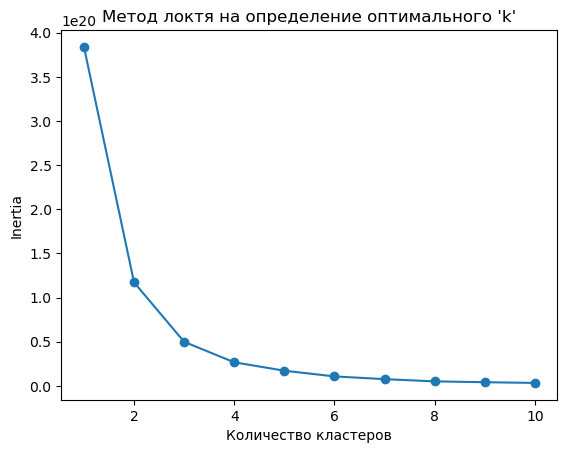

In [24]:
#выполняем подбор оптимального значения параметра модели путем сравнения метрики измерения качества кластеризации (Kmeans Inertia)
from sklearn.cluster import KMeans #библиотека алгоритма машинного обучения для кластеризации данных

inertias = []
max_num_clusters = 10
for k in range(1, max_num_clusters + 1):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(df_for_learn)
    inertias.append(kmeans.inertia_)

# Визуализация графика "Локоть"
plt.plot(range(1, max_num_clusters + 1), inertias, marker='o')
plt.xlabel("Количество кластеров")
plt.ylabel("Inertia")
plt.title("Метод локтя на определение оптимального 'k'")
plt.show()

Видно разделение датафрейма на 3 кластера

# Обучение модели K-means

In [25]:
#обучаем модель на трех кластерах
kmeans = KMeans(n_clusters=3, random_state=0)
clusters = kmeans.fit_predict(df_for_learn)

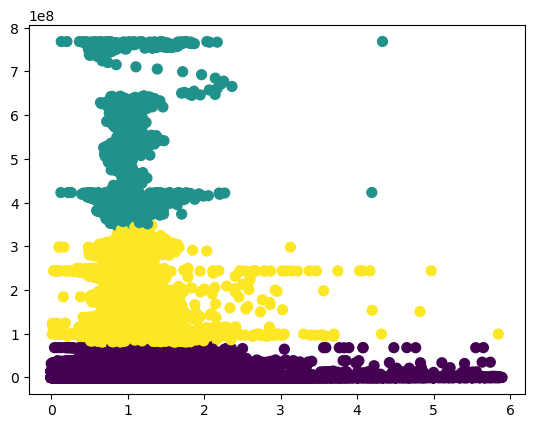

In [26]:
#график распределения точек по кластерам
plt.scatter(df_for_learn['Rt'], df_for_learn['total_cases'], c=clusters, s=50, cmap='viridis')
plt.show()

Таким образом, путем выведение нового коэффициента и алгоритма кластеризации "k-средние", получилось разбить выборку на три кластера

In [27]:
df_for_learn

,Rt,new_cases,total_cases
70,1.000,0.000,7.000
71,1.000,0.000,7.000
72,1.000,0.000,7.000
73,0.500,3.000,10.000
74,3.000,6.000,16.000
...,...,...,...
320257,1.123,9.000,"265,161.000"
320258,0.701,0.000,"265,161.000"
320259,0.202,0.000,"265,161.000"
320260,0.115,0.000,"265,161.000"


In [28]:
df

,Rt,new_cases,total_cases,date,location
70,1.000,0.000,7.000,2020-03-13,Afghanistan
71,1.000,0.000,7.000,2020-03-14,Afghanistan
72,1.000,0.000,7.000,2020-03-15,Afghanistan
73,0.500,3.000,10.000,2020-03-16,Afghanistan
74,3.000,6.000,16.000,2020-03-17,Afghanistan
...,...,...,...,...,...
320257,1.123,9.000,"265,161.000",2023-06-05,Zimbabwe
320258,0.701,0.000,"265,161.000",2023-06-06,Zimbabwe
320259,0.202,0.000,"265,161.000",2023-06-07,Zimbabwe
320260,0.115,0.000,"265,161.000",2023-06-08,Zimbabwe


In [29]:
df_for_learn["cluster"] = clusters

C:\Users\dimas\AppData\Local\Temp\ipykernel_9000\4254179663.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_for_learn["cluster"] = clusters


In [30]:
df_for_learn['cluster'].value_counts()

0    199116
2      4221
1       829
Name: cluster, dtype: int64

In [31]:
df_for_learn.describe()

,Rt,new_cases,total_cases,cluster
count,"204,166.000","204,166.000","204,166.000","204,166.000"
mean,1.123,"15,895.338","7,858,140.096",0.045
std,0.675,"124,939.356","43,362,829.233",0.291
min,0.000,0.000,1.000,0.000
25%,0.760,14.000,"11,491.250",0.000
50%,0.993,166.000,"128,635.000",0.000
75%,1.277,"1,514.000","1,006,099.250",0.000
max,5.892,"7,945,885.000","768,186,332.000",2.000


В связи с тем, что результаты кластеризации оказались несбалансированными, было принято решение сформировать кластеры при помощи разбивки по квантилям

# Разбиение выборки на кластеры по квантилям

In [32]:
#формируем кластеры по принципу: ниже 75% - 0 кластер, между 75 и 90 - 1 кластер, больше 90 - 2 кластер
quantile_75 = df_for_learn["Rt"].quantile(0.75)
quantile_90 = df_for_learn["Rt"].quantile(0.9)

def f(row):
    val = 0
    if row['Rt'] < quantile_75:
        val = 0
    elif (row['Rt'] > quantile_75) and (row['Rt'] < quantile_90):
        val = 1
    elif (row['Rt'] > quantile_90):
        val = 2
    return val

df_for_learn['quantile_cluster'] = df_for_learn.apply (f, axis=1)



In [33]:
df['quantile_cluster'] = df_for_learn['quantile_cluster']

# Формируем выборку с последними данными о каждой стране

In [34]:
#создаем выборку, в которой будут хранится последние актуальные данные по каждой стране
df_sorted = df.sort_values(by="date", inplace=False)
last_entries = df.groupby("location").last().reset_index()
last_entries

json_list = []

# Перебираем строки DataFrame
for index, row in last_entries.iterrows():
    # Создаем словарь с ключом из первого столбца и значением из второго столбца
    obj = {"country": row['location'], "cluster": row['quantile_cluster']}
    # Добавляем словарь в список объектов JSON
    json_list.append(obj)

# Преобразуем список объектов JSON в JSON-массив
json_array = json.dumps(json_list)

#выгружаем результаты разбивки на кластеры в файл json формата
with open("data.json", "w") as f:
    json.dump(json_array, f)

In [35]:
df

,Rt,new_cases,total_cases,date,location,quantile_cluster
70,1.000,0.000,7.000,2020-03-13,Afghanistan,0
71,1.000,0.000,7.000,2020-03-14,Afghanistan,0
72,1.000,0.000,7.000,2020-03-15,Afghanistan,0
73,0.500,3.000,10.000,2020-03-16,Afghanistan,0
74,3.000,6.000,16.000,2020-03-17,Afghanistan,2
...,...,...,...,...,...,...
320257,1.123,9.000,"265,161.000",2023-06-05,Zimbabwe,0
320258,0.701,0.000,"265,161.000",2023-06-06,Zimbabwe,0
320259,0.202,0.000,"265,161.000",2023-06-07,Zimbabwe,0
320260,0.115,0.000,"265,161.000",2023-06-08,Zimbabwe,0


In [36]:
df_for_learn['quantile_cluster'].value_counts()

0    153124
1     30625
2     20417
Name: quantile_cluster, dtype: int64

Иной метод формирования кластеров оказался более сбалансированным, реалистичным и подходящим для контекста задачи

In [37]:
df_for_learn.drop(columns=["cluster"], inplace=True)

In [38]:
quantile_clusters = df_for_learn[['quantile_cluster']].to_numpy()

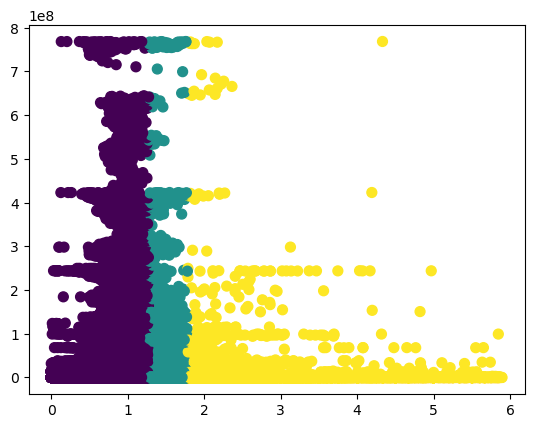

In [39]:
#график распределения точек по кластерам
plt.scatter(df_for_learn['Rt'], df_for_learn['total_cases'], c=quantile_clusters, s=50, cmap='viridis')
plt.show()